📌 Dataset Shape: (1000, 8)

📌 First 5 rows:
    Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  

📌 Missing Values:
 Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
Ho

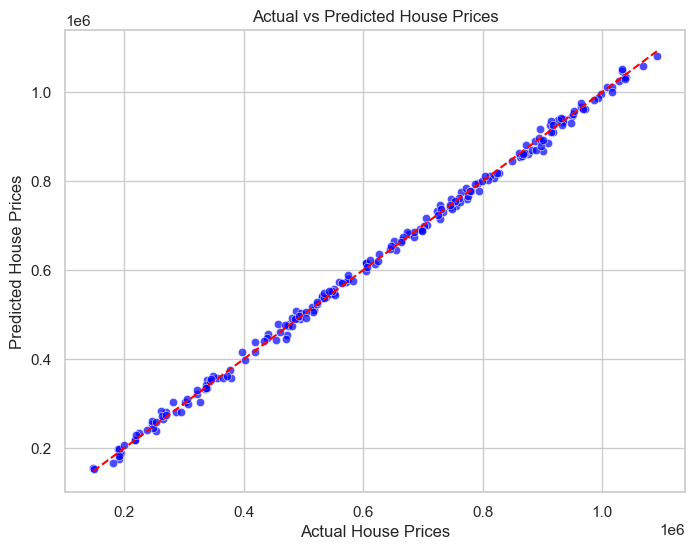

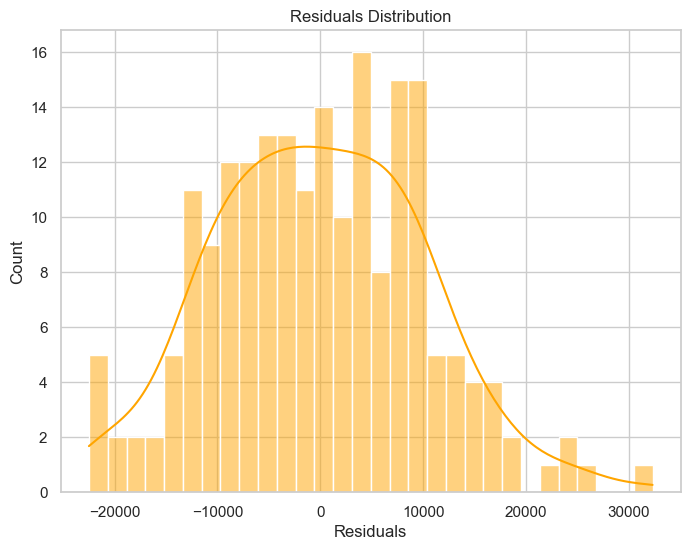

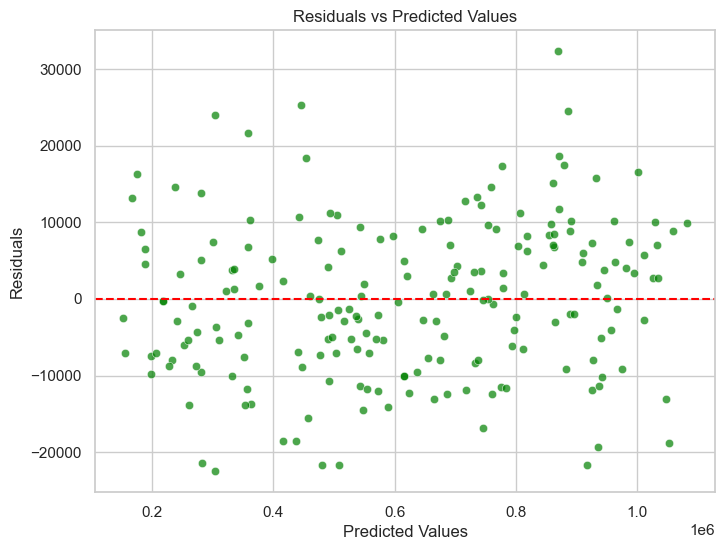

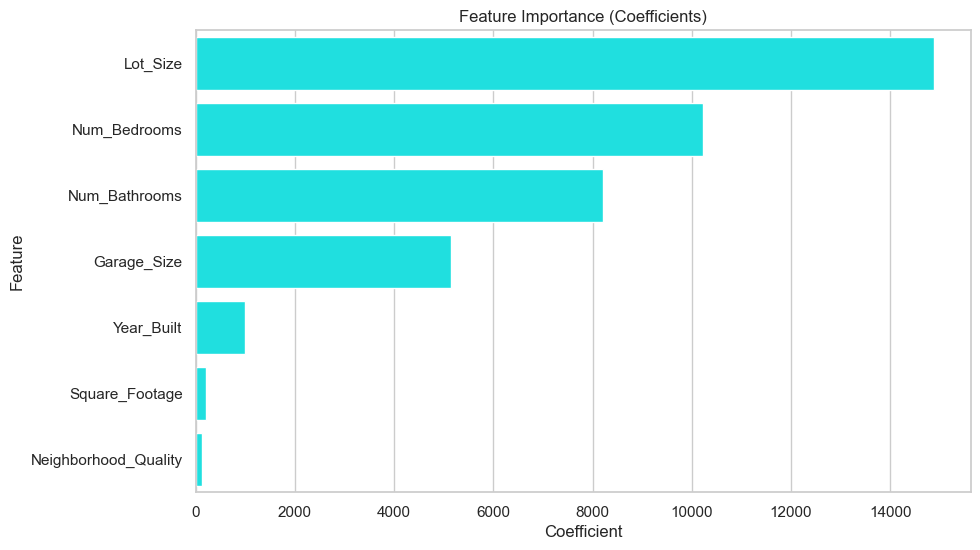

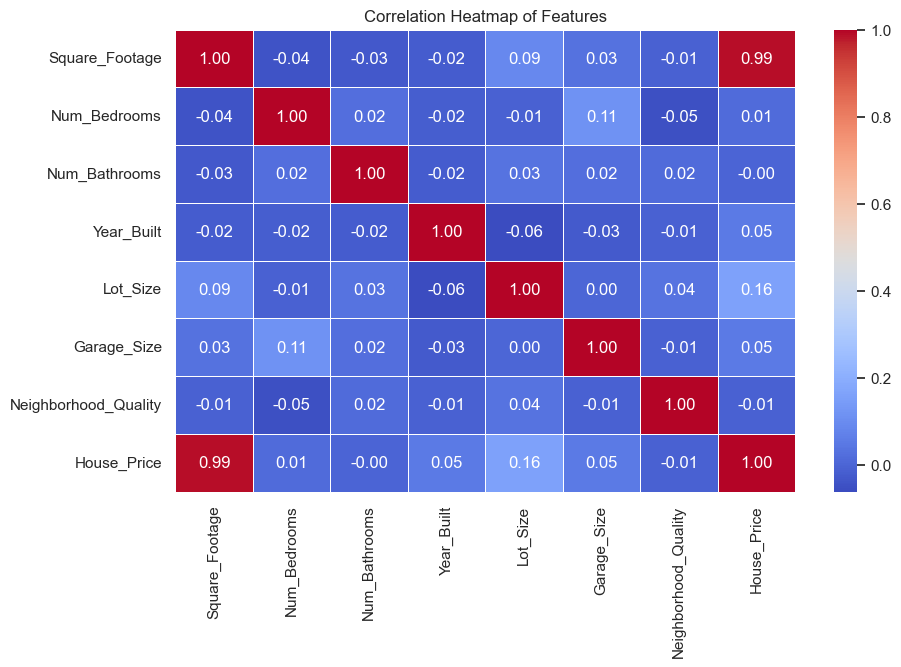

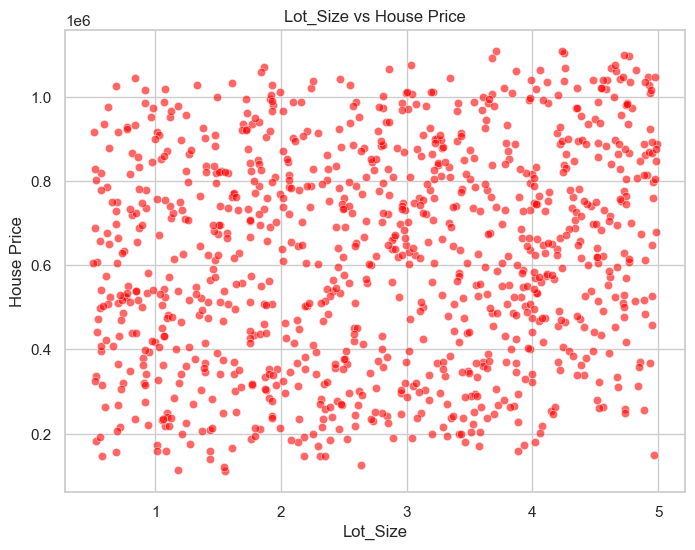

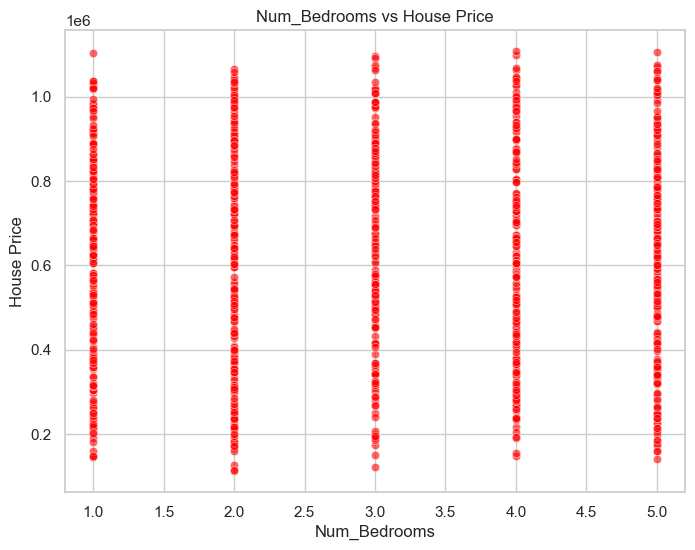

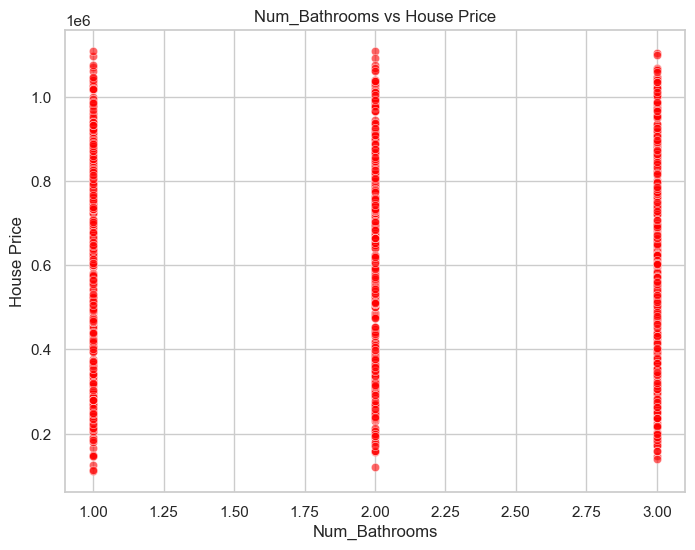

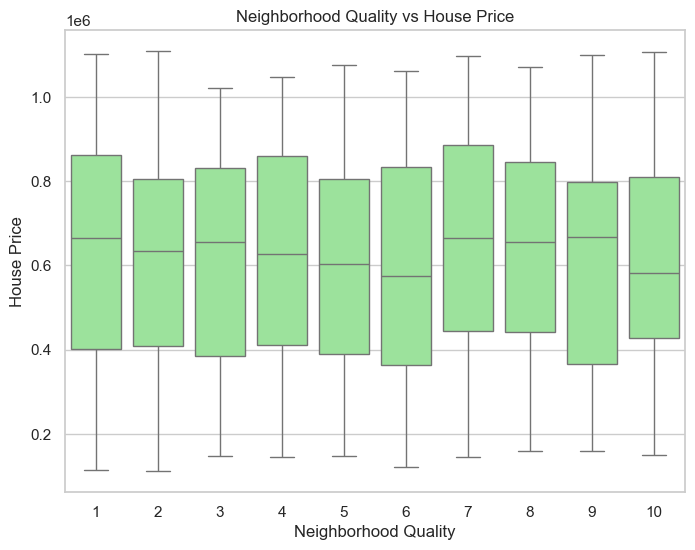

In [21]:
# 📌 Project 3: Predicting House Prices with Linear Regression

# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
data = pd.read_csv("C:/Users/Abdullah Umer/Desktop/Data Zenix Solutions Internship/Project 3/House_Price_Regression_Dataset.csv")

# Display basic info
print("📌 Dataset Shape:", data.shape)
print("\n📌 First 5 rows:\n", data.head())
print("\n📌 Missing Values:\n", data.isnull().sum())

# 3. Data Cleaning
# Drop rows with missing target values (if any)
data = data.dropna(subset=['House_Price'])

# Fill missing numerical values with median (fixed warning)
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].median())

# Fill missing categorical values (if any) with mode (fixed warning)
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# 4. Feature Selection
# Select numeric features only
numeric_features = data.select_dtypes(include=[np.number])

# Define target and features
X = numeric_features.drop('House_Price', axis=1)
y = numeric_features['House_Price']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Model Prediction
y_pred = model.predict(X_test)

# 8. Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Metrics:")
print("📌 Mean Squared Error:", mse)
print("📌 Root Mean Squared Error:", rmse)
print("📌 R² Score:", r2)

# 9. Visualization

# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()

# Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color="orange")
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color="green")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Feature Importance (Linear Regression Coefficients)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coefficients, x="Coefficient", y="Feature", color="cyan")  # fixed palette warning
plt.title("Feature Importance (Coefficients)")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Top Features vs House Price (Scatterplots)
top_features = coefficients["Feature"].head(3).tolist()
for feature in top_features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=data[feature], y=data["House_Price"], alpha=0.6, color="red")
    plt.xlabel(feature)
    plt.ylabel("House Price")
    plt.title(f"{feature} vs House Price")
    plt.show()

# Categorical Feature vs House Price (Boxplot if categorical exists)
if "Neighborhood_Quality" in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=data["Neighborhood_Quality"], y=data["House_Price"], color="lightgreen")  # fixed palette warning
    plt.xlabel("Neighborhood Quality")
    plt.ylabel("House Price")
    plt.title("Neighborhood Quality vs House Price")
    plt.show()











